# Intro
My data analysis will explore the relationship between Internet Movie DataBase scores and The Movie DataBase scores

# Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/tgut03/Jupyter/Data/Netflix Titles.csv")
df.drop(df.columns.difference(["title", "imdb_score", "tmdb_score"]), axis = 1, inplace = True)
df.head()

,title,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,NaN,NaN
1,Taxi Driver,8.2,8.179
2,Deliverance,7.7,7.300
3,Monty Python and the Holy Grail,8.2,7.811
4,The Dirty Dozen,7.7,7.600


In [3]:
dfInfo = pd.DataFrame()
dfInfo["Type"] = df.dtypes
dfInfo["Nulls"] = df.isnull().sum()
dfInfo["Uniques"] = df.nunique()
print(dfInfo)
print(df.shape)

               Type  Nulls  Uniques
title        object      1     5798
imdb_score  float64    482       80
tmdb_score  float64    311      394
(5850, 3)


Key Insights
- 1 string 2 decimals
- 792 null scores
- 52 duplicate titles

# Transform

In [4]:
# Replace Nulls
med = df.quantile(0.50)
df.fillna(med, inplace = True)

In [5]:
# Remove Duplicates
df["title"].drop_duplicates(inplace = True)

# Explore

In [6]:
# Score Frequency
IMDB = df["imdb_score"].round().value_counts().rename("IMDB")
TMDB = df["tmdb_score"].round().value_counts().rename("TMDB")
scoreFrequency = pd.concat([IMDB, TMDB], axis = 1)
scoreFrequency

,IMDB,TMDB
7.0,2169.0,2171
6.0,1630.0,1538
8.0,1028.0,1292
5.0,603.0,399
4.0,242.0,116
9.0,95.0,195
3.0,58.0,18
2.0,22.0,19
10.0,3.0,91
1.0,NaN,10


Key Insights
- the most frequent score is 7
- the least frequent imdb score is 10 while the least frequent tmdb score is 0

In [7]:
# Outliers
IQR = df.quantile(0.75, numeric_only = True) - df.quantile(0.25, numeric_only = True)
lower = df.quantile(0.25, numeric_only = True) - 1.5 * IQR
upper = df.quantile(0.75, numeric_only = True) + 1.5 * IQR
outliers = (df < lower) | (df > upper)
imdbOuts = outliers["imdb_score"]
tmdbOuts = outliers["tmdb_score"]
print(f"imdb outliers = {imdbOuts.sum()}")
print(f"tmdb outliers = {tmdbOuts.sum()}")

imdb outliers = 138
tmdb outliers = 215


Key Insights
- 353 scores significantly deviate from the majority of scores 

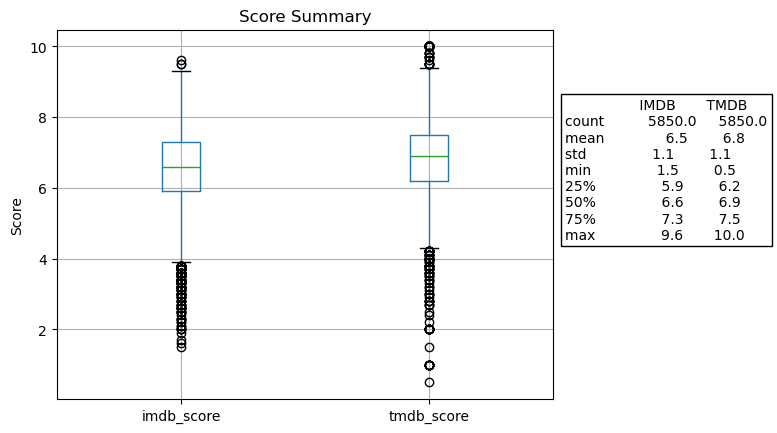

In [8]:
# Score Summary
IMDB = df["imdb_score"].describe().round(1).rename("IMDB")
TMDB = df["tmdb_score"].describe().round(1).rename("TMDB")
scoreSummary = pd.concat([IMDB, TMDB], axis = 1)

# Table
table = scoreSummary.to_string(col_space = 10)
plt.text(2.55, 6.5, table, ha = "left", va = "center", bbox = dict(boxstyle = "square", facecolor = "white"))

# Boxplot
df.boxplot(column = ["imdb_score", "tmdb_score"], showfliers = True)
plt.ylabel("Score")
plt.title("Score Summary")
plt.show()

Key Insights
- on average the scores vary 1.1 units from the mean
- expect some negative skewness bc the mean < median
- boxplots visualize the five number summary

In [9]:
# Variance
imdbVar = df["imdb_score"].var()
tmdbVar = df["tmdb_score"].var()
print(f"imdb variance = {round(imdbVar, 2)}")
print(f"tmdb variance = {round(tmdbVar, 2)}")

imdb variance = 1.24
tmdb variance = 1.3


Key Insights
- low variability of scores imply clusters about the mean

In [10]:
# Skewness
imdbSkew = df["imdb_score"].skew()
tmdbSkew = df["tmdb_score"].skew()
print(f"imdb skew = {round(imdbSkew, 2)}")
print(f"tmdb skew = {round(tmdbSkew, 2)}")

imdb skew = -0.68
tmdb skew = -0.52


Key Insights
- the tail of the distribution extends to the left

In [11]:
# Kurtosis
imdbKurt = df["imdb_score"].kurt()
tmdbKurt = df["tmdb_score"].kurt()
print(f"imdb kurtosis = {round(imdbKurt, 2)}")
print(f"tmdb kurtosis = {round(tmdbKurt, 2)}")

imdb kurtosis = 1.0
tmdb kurtosis = 2.43


Key Insights
- positive kurtosis imply high peakedness

NameError: name 'ax1' is not defined

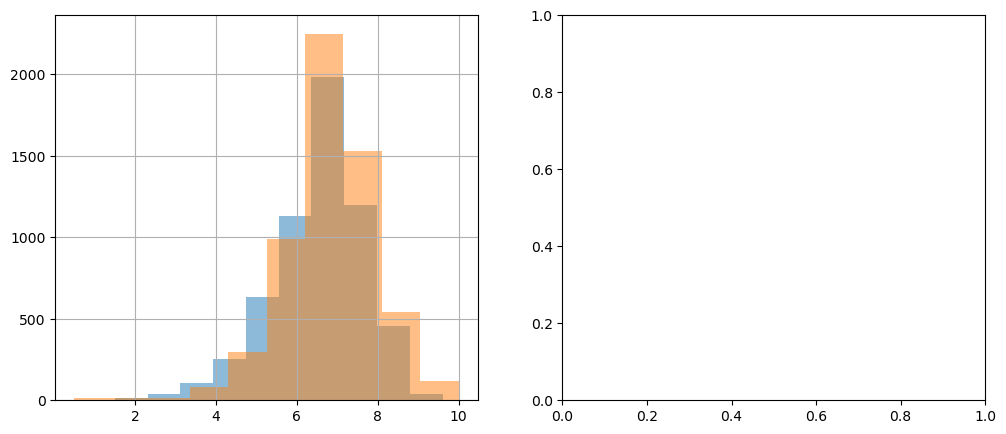

In [12]:
# 1 Figure 2 Subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Histogram
df["imdb_score"].hist(alpha = 0.5, bins = 10, label = "IMDB", ax = ax[0])
df["tmdb_score"].hist(alpha = 0.5, bins = 10, label = "TMDB", ax = ax[0])
ax1.set_xlabel("Score")
ax1.set_ylabel("Frequency")
ax1.legend()

# Kernel Density Estimate
df["imdb_score"].plot.kde(label = "IMDB", ax = ax[1])
df["tmdb_score"].plot.kde(label = "TMDB", ax = ax[1])
ax2.set_xlabel("Score")
ax2.set_ylabel("Density")
ax2.legend()

plt.subplots_adjust(wspace = 0.5)
fig.suptitle("Score Distribution")
plt.show()

Key Insights
- histograms visualize the distribution of frequency
- kernel density estimates visualize the distribution of probability density

In [ ]:
# Scatterplot
df.plot.scatter(x = "imdb_score", y = "tmdb_score")

# Calculate Regression
coefficient = np.polyfit(df["imdb_score"], df["tmdb_score"], 1).round(2)
m = coefficient[0] # Slope
b = coefficient[1] # Intercept
linRegEq = (f"y = {m}x + {b}")

# Plot Regression
plt.plot(df["imdb_score"], m * df["imdb_score"] + b, color = "orange", label = linRegEq)
plt.title("Score Relationship")

plt.xlabel("IMDB")
plt.ylabel("TMDB")
plt.legend()
plt.show()

Key Insights
- scatterplots visualize the relationship between 2 variables
- linear regression lines best fit the relationship between 2 variables

In [ ]:
# Covariance
cov = df["imdb_score"].cov(df["tmdb_score"])
print(f"covariance = {round(cov, 2)}")

Key Insights
- scores tend to change together toward similar direction

In [ ]:
# Correlation
corr = df["imdb_score"].corr(df["tmdb_score"])
print(f"correlation = {round(corr, 2)}")

Key Insights
- scores tend to change together toward similar direction

# Conclusion
The correlation coefficient measures the strength and direction of the relationship between 2 variables. The relationship between IMDB scores and TMDB scores can provide value to netflix enthusiasts who seek reliable ratings or present a business opportunity to merge the 2 associated platforms into 1 integrated user experience.

Reminder - correlation does not imply causation. The next step for this analysis would be to implement additional variables to identify causal factors. 